### Hello jupyter

In [1]:
print('Hello world!')

Hello world!


# Preços de residências da Califórnia(1990)
Prática adaptada do livro Hands-On Machine Learning with Scikit-Learn and Tensorflow(Simplificada para fins didáticos).

<b> Dados:</b>
- longitude

- latitude

- housing_median_age

- total_rooms

- total_bedrooms

- population

- households

- median_income

- median_house_value

- ocean_proximity

#### Principais passos:
1. Observar o panorama geral.
2. Coletar os dados.
3. Explorar e Visualizar os dados para ganhar "insights".
4. Preparar os dados para os algoritmos de Machine Learning.
5. Selecionar o modelo e treinar.
6. "Tunar" seu modelo.

# 1. Observar o panorama geral.
* Aprendizagem supervisionada.
* Problema de regressão
* Selecionar medida de performance:
  * RMSE - Root Mean Square Error (Raíz quadrada do erro quadrático médio)
  
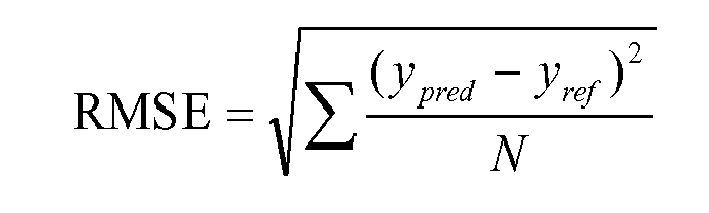

# 2. Coletar os dados.
<p> Em seu terminal(Linux):
* ><b>\$</b> wget https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.tgz
* ><b>\$</b> tar xvzf housing.tgz
* ><b>\$</b> cd housing/
* ><b>\$</b> jupyter notebook

# 3. Explorar e Visualizar os dados para ganhar "insights".

Importar bibliotecas necessárias:

In [2]:
import numpy as np # Operações com arrays e matrizes
import pandas as pd # Manipulação de dados
import matplotlib.pyplot as plt # Visualização

%matplotlib inline

Carregar o dataset (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html):

In [3]:
housing = pd.read_csv('housing.csv')

Observar a estrutura dos dados:

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotar histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f9b4a0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f94f99b6c88>]], dtype=object)

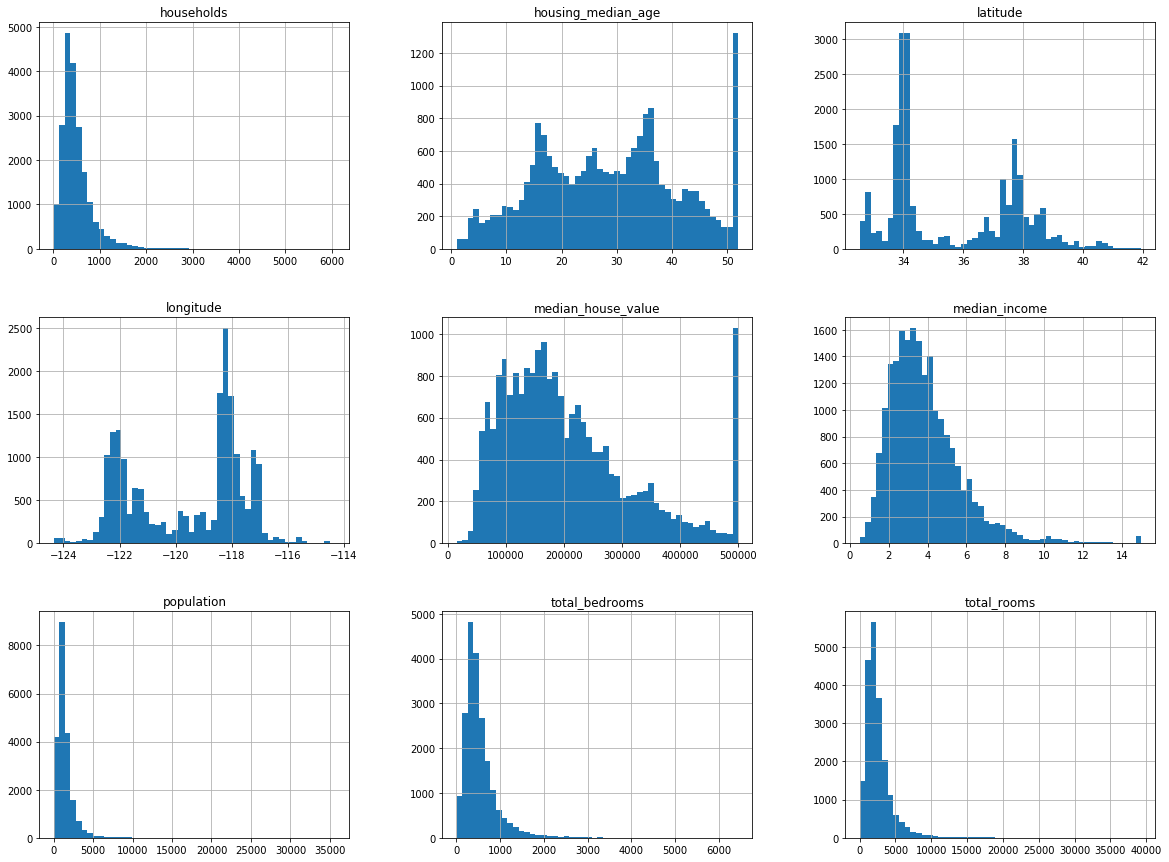

In [7]:
housing.hist(bins=50, figsize=(20, 15))

# 3. Explorar e Visualizar os dados para ganhar "insights".

Plotar gráfico de dispersão (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html):

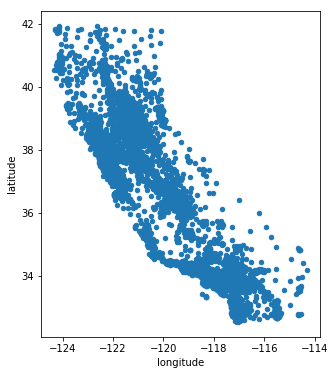

In [8]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(5, 6))

Comparar com mapa da Califórnia:

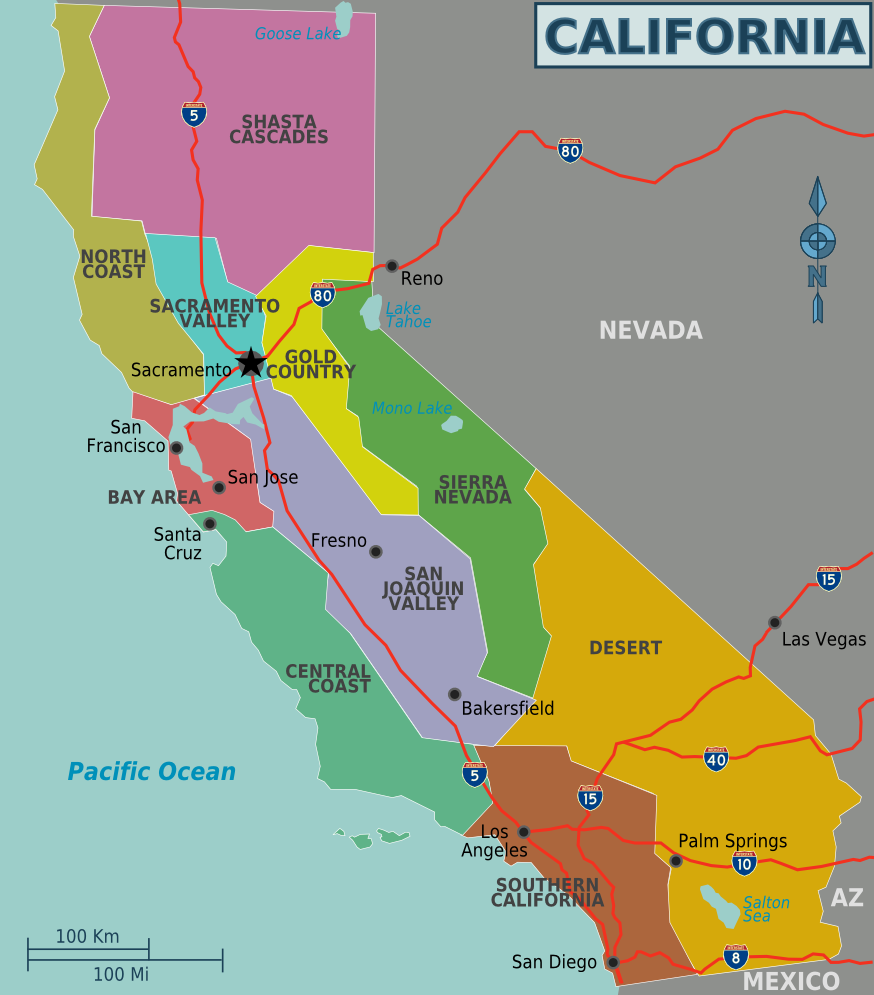

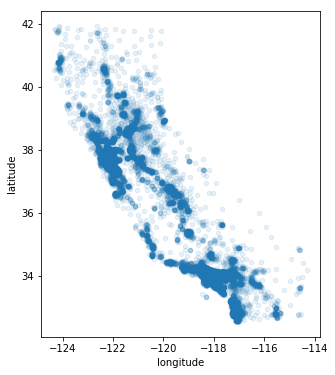

In [9]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(5, 6))

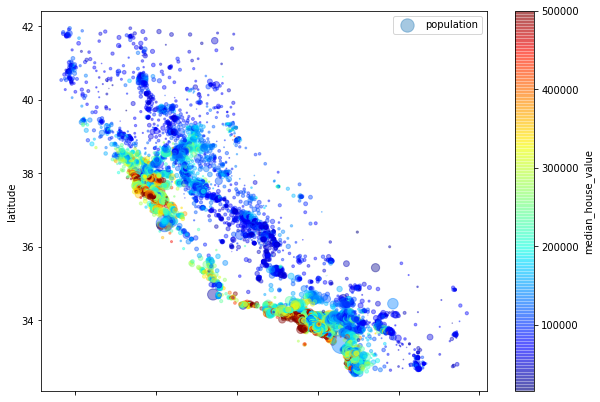

In [10]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population', figsize=(10, 7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

Procurar correlações:

In [11]:
corr_matrix = housing.corr()

In [12]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Dica: http://guessthecorrelation.com/

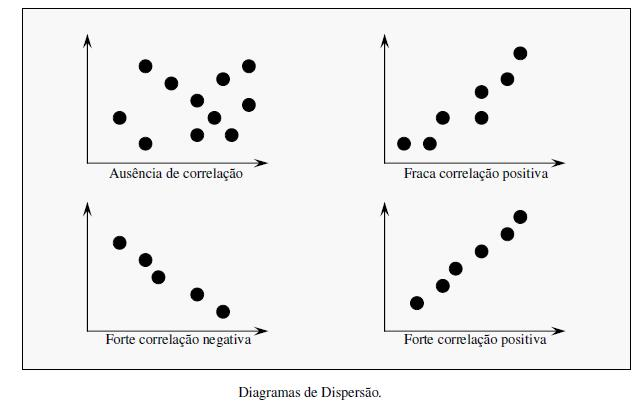

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f94dccf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f94f40de358>]], dtype=object)

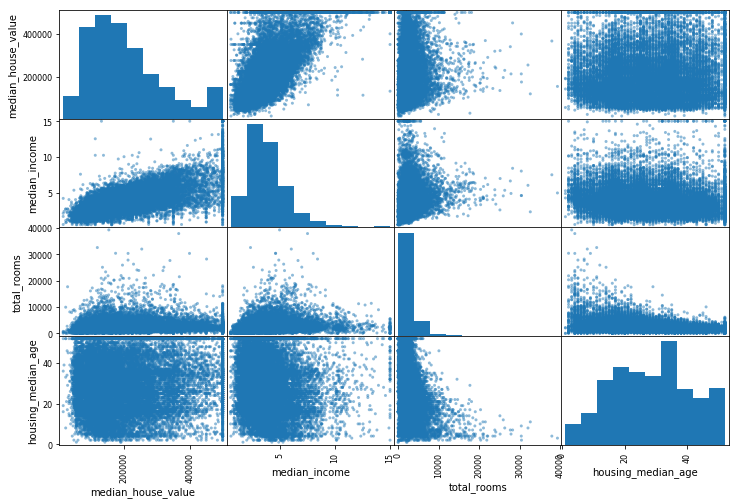

In [13]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

# 4. Preparar os dados para os algoritmos de Machine Learning.

Limpar os dados

<p> Tratar valores nulos:

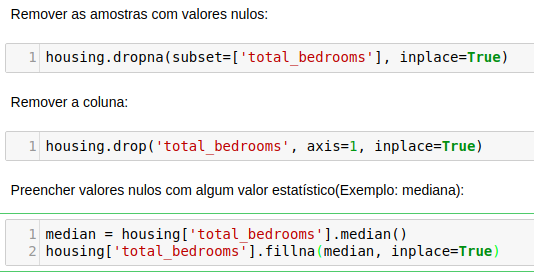

Preencher com a mediana(valores mais comuns) usando sklearn(http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html):

In [14]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

In [15]:
imputer.fit(housing[['total_bedrooms']])
imputer.statistics_

array([ 435.])

In [16]:
housing['total_bedrooms'].median()

435.0

In [17]:
housing['total_bedrooms'] = imputer.transform(housing[['total_bedrooms']])
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Tratando variável categórica:

In [18]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Codificar categorias em classes numéricas usando LabelEncoder(http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html):

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(housing['ocean_proximity'])
housing['ocean_proximity'] = label_encoder.transform(housing['ocean_proximity'])
housing['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [20]:
label_encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

One-Hot-Encoder(http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(housing[['ocean_proximity']])
housing_cat_1hot = encoder.transform(housing[['ocean_proximity']])
housing_cat_1hot

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [22]:
housing_cat_1hot = pd.DataFrame(housing_cat_1hot, columns=label_encoder.classes_, index=housing.index)

In [23]:
dataset = pd.concat([housing, housing_cat_1hot], axis=1)
dataset.drop('ocean_proximity', axis=1, inplace=True)

In [24]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


Separar atributos de treinamento(Entrada do modelo) e rótulo(saída do modelo):

In [25]:
X = dataset.drop('median_house_value', axis=1)
y = dataset['median_house_value'].copy()

Separar os conjuntos de treino e teste(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Selecionar o modelo e treinar.

Usando LinearRegression(http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html):

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
some_data = X_train.iloc[-5:]
some_labels = y_train.iloc[-5:]
print(f'Predictions: {lin_reg.predict(some_data)}')
print(f'Labels: {list(some_labels)}')

Predictions: [ 318005.2537257   121386.81250688  194624.05524513  281818.52422053
  271572.84185842]
Labels: [229200.0, 97800.0, 222100.0, 283500.0, 325000.0]


In [29]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68433.937366662256

Usando DecisionTreeRegressor(http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Melhor avaliação usando Validação cruzada/Cross-Validation (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html):

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
print('Scores: ', np.sqrt(-scores))
print('Mean: ', np.sqrt(-scores.mean()))
print('Standard deviation: ', np.sqrt(scores.std()))

Scores:  [ 65822.79445705  68450.80102741  67037.93164795  69885.14646436
  68315.99470341  66942.05777489  63897.64476738  68420.70931401
  69676.41916003  67393.56661255]
Mean:  67605.8306039
Standard deviation:  15121.612708


Usando RandomForest(http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html):

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [34]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)

print('Scores: ', np.sqrt(-scores))
print('Mean: ', np.sqrt(-scores.mean()))
print('Standard deviation: ', np.sqrt(scores.std()))

Scores:  [ 49789.78296303  53538.51022666  49168.9323563   51749.92964206
  51960.06915362  49244.64118589  48668.60762264  53410.04308096
  52160.3218345   52387.65566381]
Mean:  51237.0460443
Standard deviation:  13290.0474926


# 6. "Tunar" seu modelo.

Usar GridSearch com cross-validation(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [36]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [37]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [38]:
np.sqrt(-grid_search.best_score_)

49467.478596379413

### Avaliar seu sistema no conjunto de teste

In [39]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48848.411260334899

# Próximos passos:
* Criar conta no site http://www.kaggle.com
* Entrar na competição do Titanic, baixar dataset, criar um novo notebook, desenvolver seu modelo e submeter suas predições de teste. (https://www.kaggle.com/c/titanic)
    * Dica: Selecionando "Kernels" no menu você encontra notebooks de análises feitas por outros competidores.

* Após terminar o Titanic existem mais duas competições iniciais:
    * https://www.kaggle.com/c/house-prices-advanced-regression-techniques (Similar a que fizemos aqui)
    * https://www.kaggle.com/c/digit-recognizer (Reconhecimento de imagens)

# Estudos:
* Livros:
    * Python para Data Science: https://github.com/andradejunior/PythonDataScienceHandbook (Gratuito)
    * Estatística: http://greenteapress.com/wp/think-stats-2e/ (Gratuito)
    * Machine Learning: https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291
* Cursos Online:
    * Python: http://pycursos.com/python-para-zumbis/ (Gratuito)
    * Data Science: https://www.udemy.com/ recomendo os do José Portilla (Há promoções de R$ 20,00)
    * Machine Learning(Mais Prático): https://www.datacamp.com/ (Acesso grátis em apenas alguns módulos)
    * Machine Learning(Mais Teórico): https://www.coursera.org/learn/machine-learning (Paga apenas se quiser certificado)
    * Para Cálculo e Álgebra Linear: https://pt.khanacademy.org ou https://www.edx.org (Gratuito)